<a href="https://colab.research.google.com/github/balajiabcd/Breast-Cancer-Detection/blob/main/breast_cancer_detection02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd 
import random
from sklearn.model_selection import train_test_split as tts
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [2]:
data = pd.read_csv("/content/breast-cancer.csv")
data.head(2)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


#### Data has 32 columns. id, diagnosis, 10 variables of 3 types (Mean, se, worst) 

# Diagnosis are M = Malignent(Cancer) and B = Benign(No Cancer)

In [3]:
data.diagnosis.unique()

array(['M', 'B'], dtype=object)

#### Observe no NaN in that column, which means we can use all the data with respect to Diagnosis column

# Assigning M to 1 and B to 0

In [4]:
data.diagnosis = (data.diagnosis == "M") * 1
data.head(2)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [5]:
data.diagnosis.sum()

212

# General One Person Data 

In [6]:
print(len(data.iloc[2,:]),len(data))
data.iloc[2,:]

32 569


id                         8.430090e+07
diagnosis                  1.000000e+00
radius_mean                1.969000e+01
texture_mean               2.125000e+01
perimeter_mean             1.300000e+02
area_mean                  1.203000e+03
smoothness_mean            1.096000e-01
compactness_mean           1.599000e-01
concavity_mean             1.974000e-01
concave points_mean        1.279000e-01
symmetry_mean              2.069000e-01
fractal_dimension_mean     5.999000e-02
radius_se                  7.456000e-01
texture_se                 7.869000e-01
perimeter_se               4.585000e+00
area_se                    9.403000e+01
smoothness_se              6.150000e-03
compactness_se             4.006000e-02
concavity_se               3.832000e-02
concave points_se          2.058000e-02
symmetry_se                2.250000e-02
fractal_dimension_se       4.571000e-03
radius_worst               2.357000e+01
texture_worst              2.553000e+01
perimeter_worst            1.525000e+02


#### Total 569 people went to Diagnosis

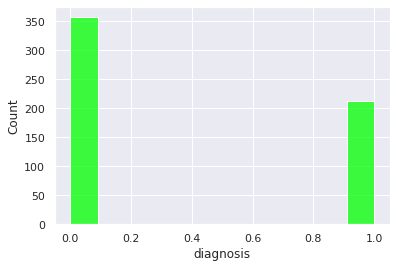

In [7]:
sns.histplot(x=data.diagnosis, color = "lime")

# Heat map

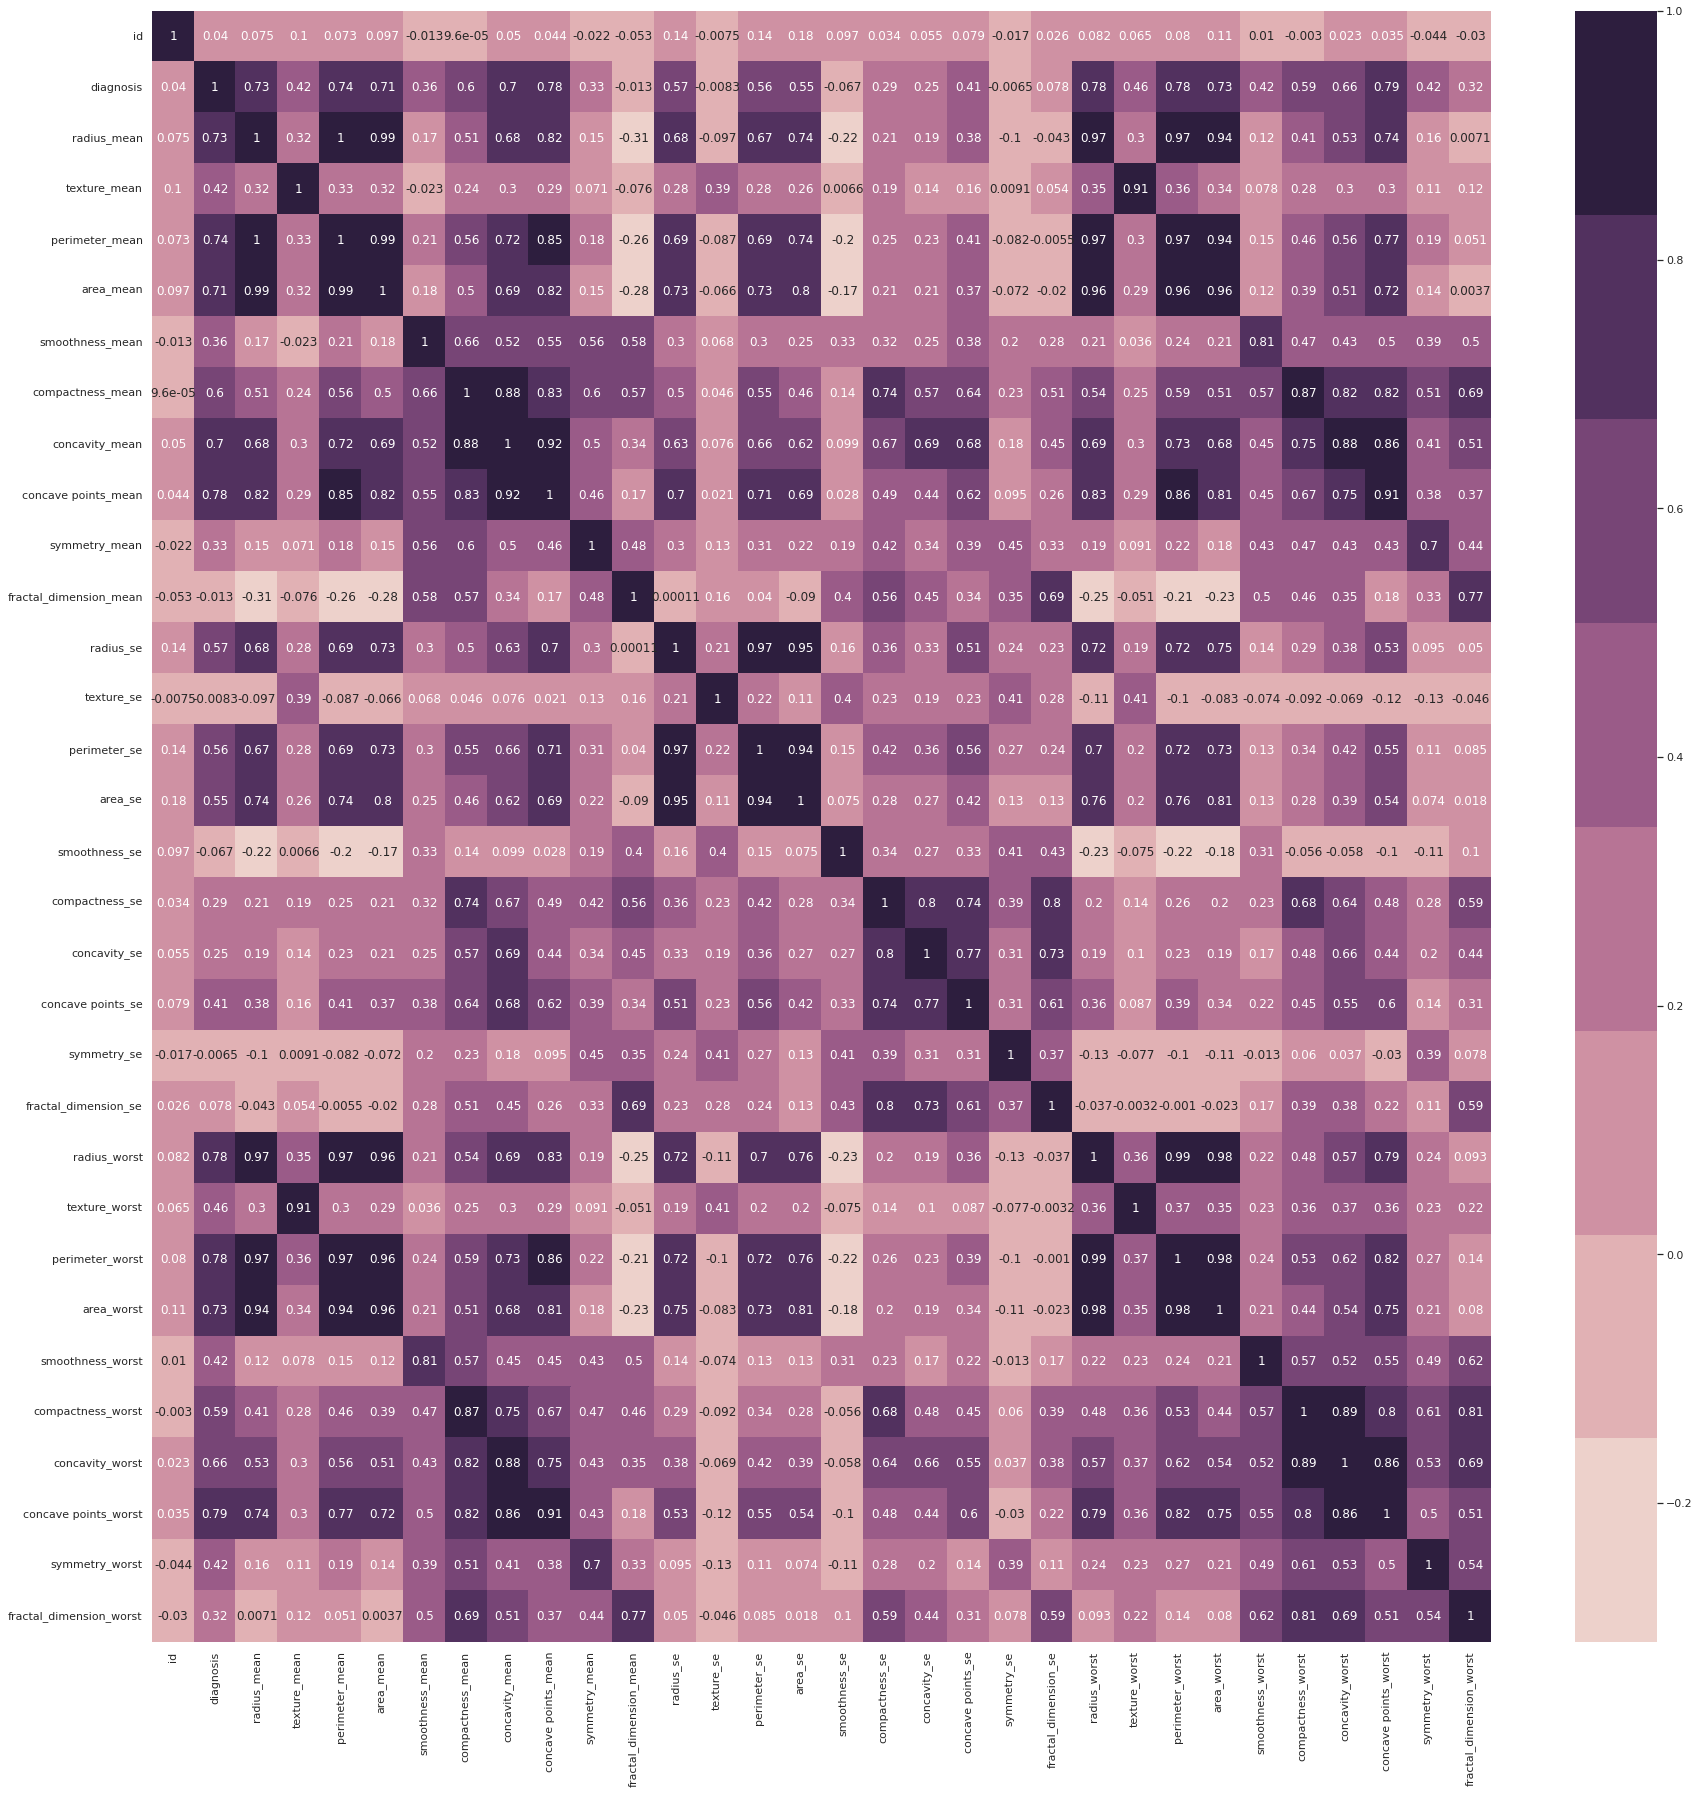

In [8]:
plt.figure(figsize = (30,30))
sns.heatmap(data.corr(), cmap = sns.cubehelix_palette(8),annot = True)

#### We can see that radius_mean has stong corrilation with perinmeter_mean/worst, area_mean/worst, radius_worst. So we can remove these 5 variablis.

#### radius_se has strong corrilation with perimeter_se and area_se. So removing those 2

#### Concavity_mean has stron corrilation with concavepoints_mean/worst and conpactness_ mean, concavity_worst. So we remove these 4 variables.

#### Texture_worst and texture_mean are in corrilation. So we can remove one.

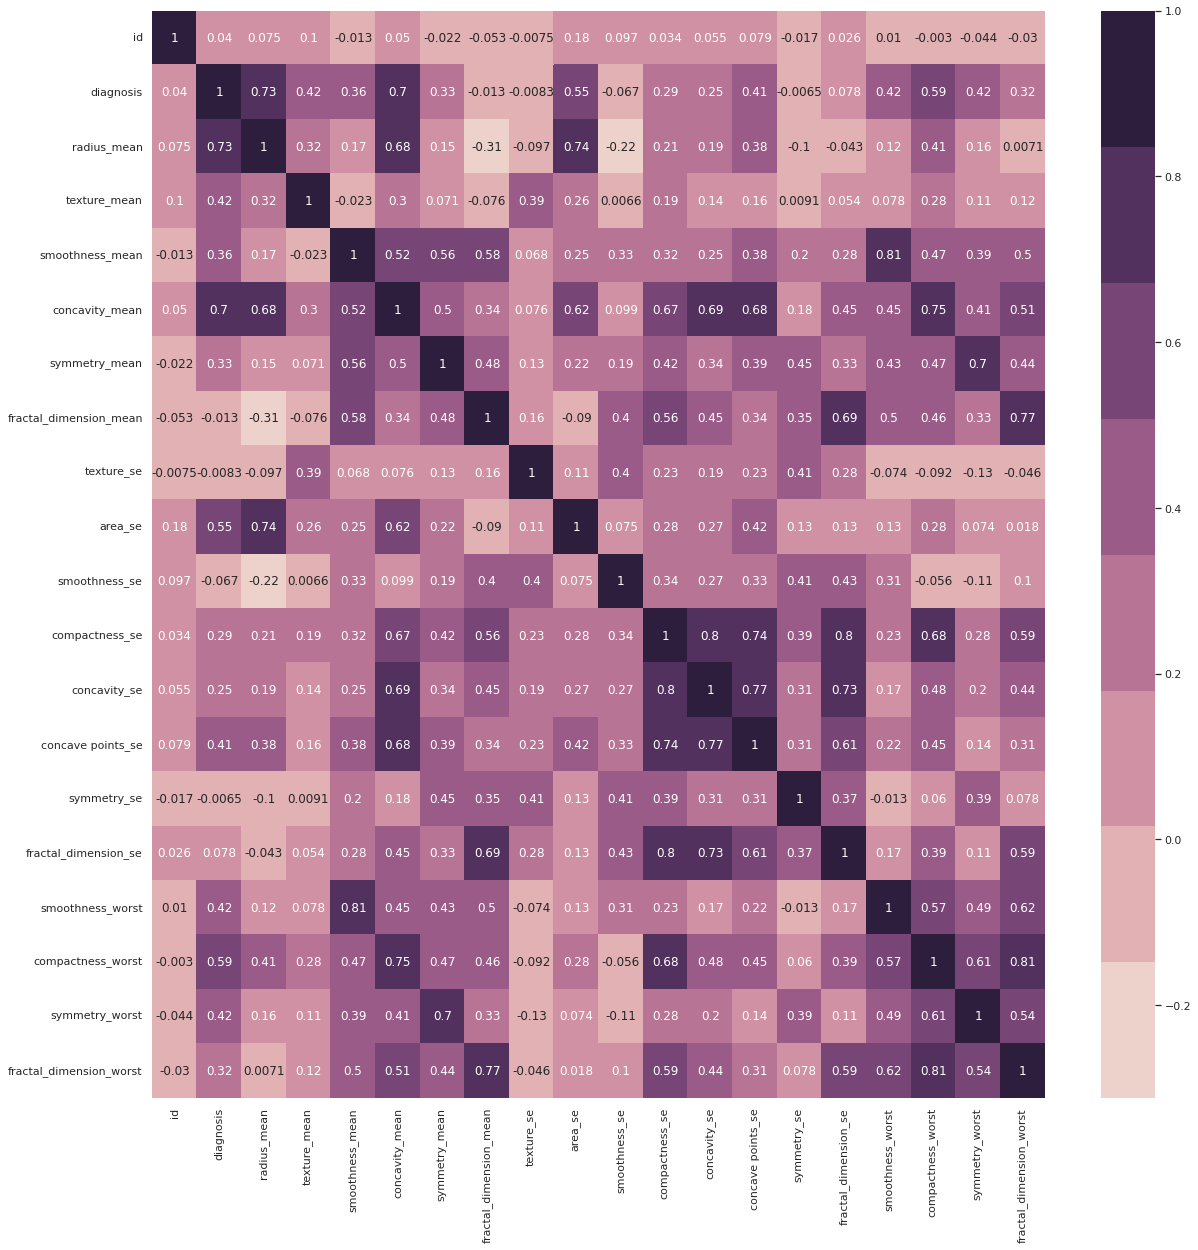

In [9]:
data = data.drop(["perimeter_worst", "perimeter_mean", "area_mean", "area_worst", "radius_worst", 
               "compactness_mean", "concave points_mean", "concave points_worst", "concavity_worst", 
               "radius_se", "perimeter_se","texture_worst"], axis = 1)

plt.figure(figsize = (20,20))
sns.heatmap(data.corr(), cmap = sns.cubehelix_palette(8),annot = True)

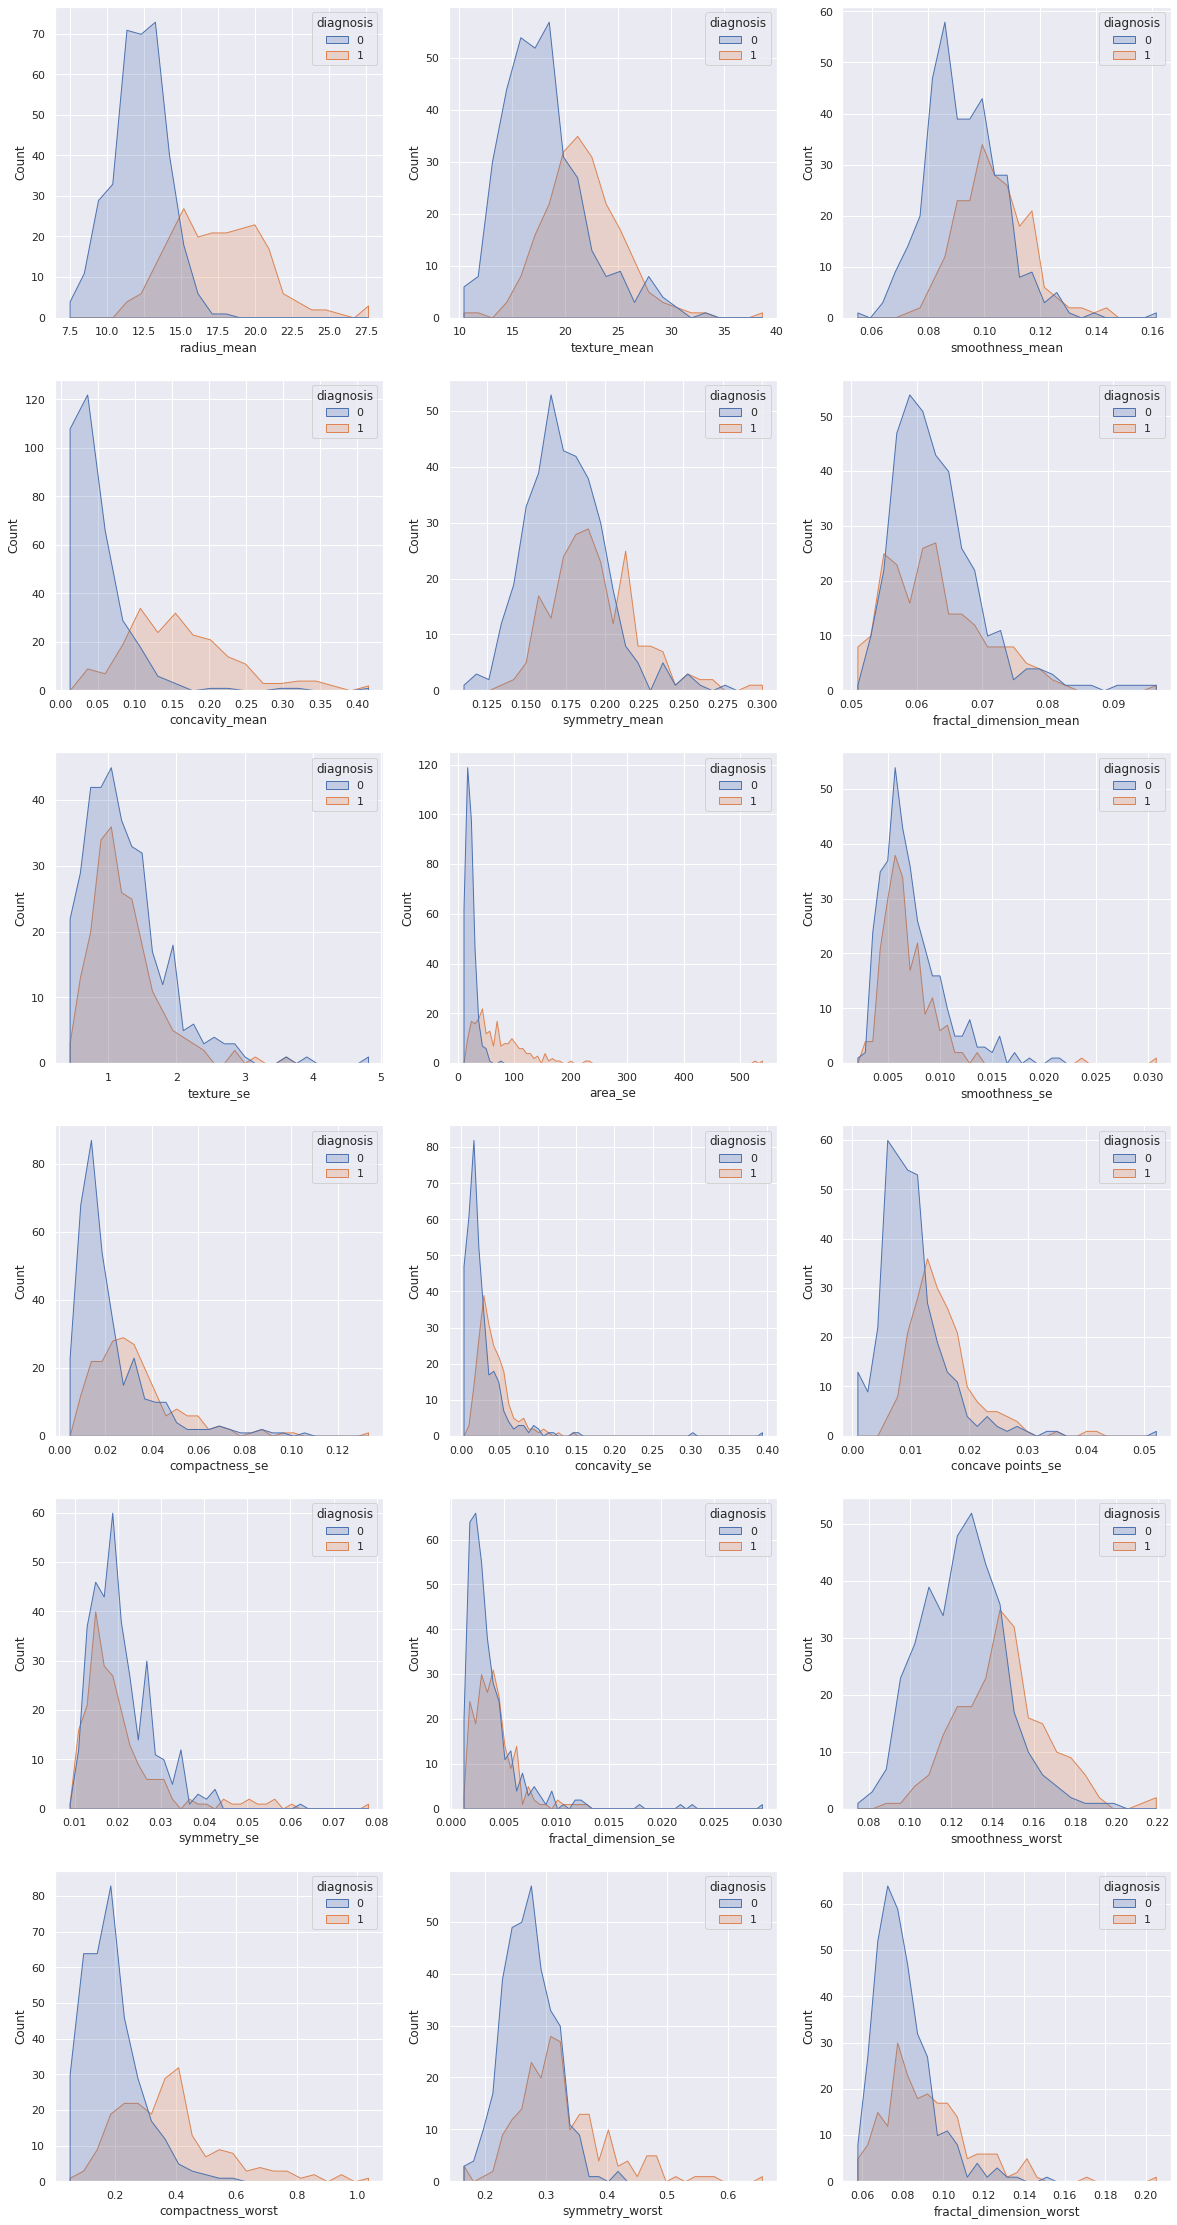

In [10]:
fig, ax = plt.subplots(nrows = 6, ncols = 3, figsize = (20, 40))
a = 2
for i in range(6):
    for j in range(3):
        sns.histplot(data, x=data.columns[a], element = "poly", ax = ax[i,j], hue = "diagnosis" )
        a = a+1

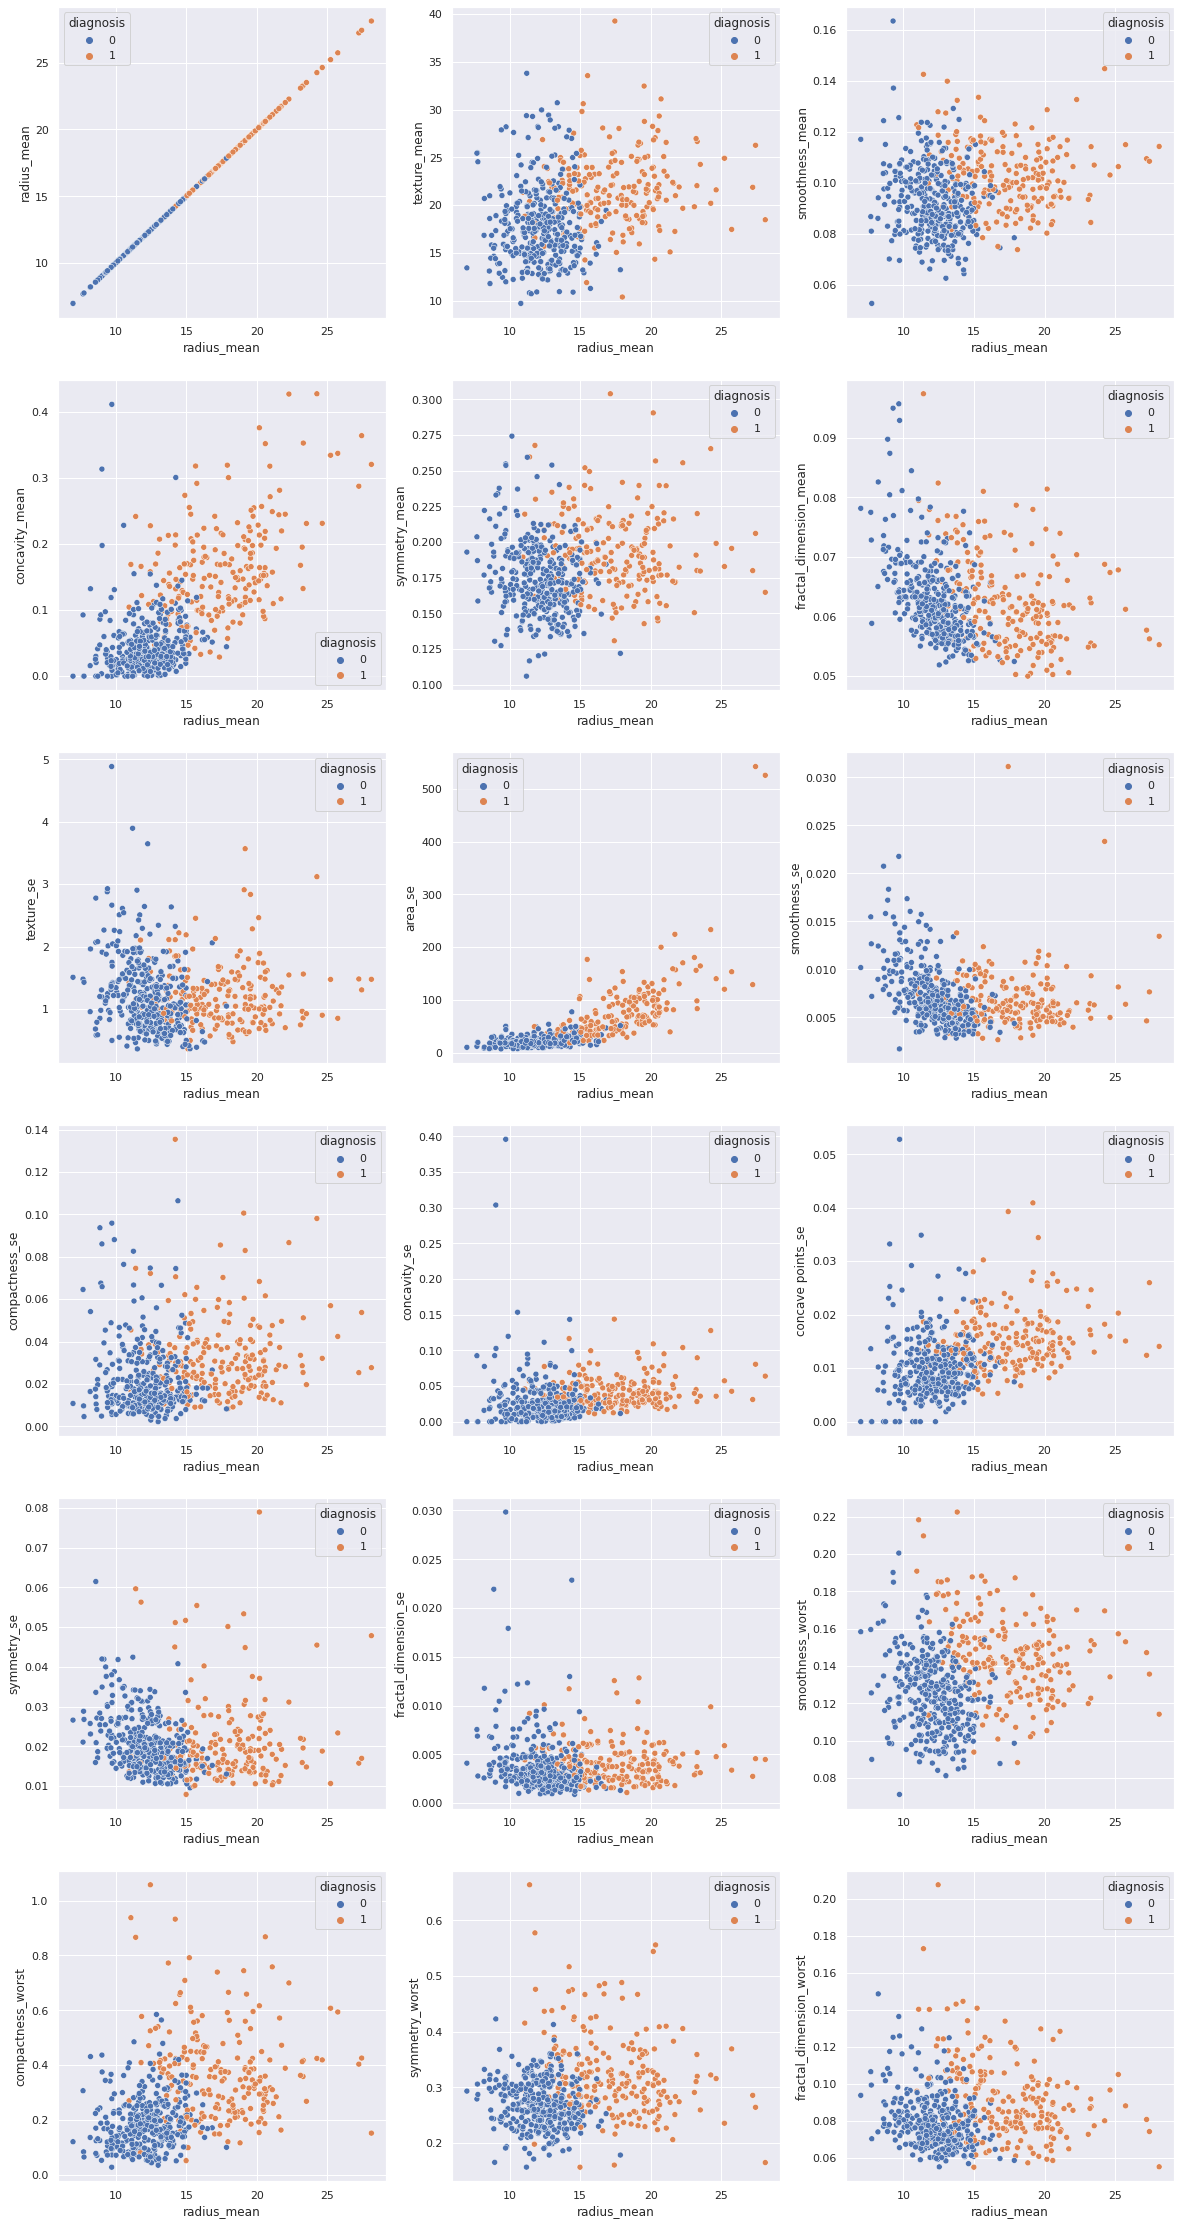

In [11]:
fig, ax = plt.subplots(nrows = 6, ncols = 3, figsize = (20, 40))
a = 2
for i in range(6):
    for j in range(3):
        sns.scatterplot(x='radius_mean', y=data.columns[a], data=data, hue='diagnosis', ax = ax[i,j])
        a = a+1

#### There are certainly some patterns to recognize Breast Cancer, based on the above 2 plots.

# Splitting Data into Train and Test data

In [12]:
Y = data.diagnosis
X = data.drop("diagnosis", axis = 1)

X_train, X_test, Y_train, Y_test = tts(X, Y, random_state = 143, test_size = 0.4)

# Scaling 

In [13]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
scalar.fit_transform(X_train)
scalar.transform(X_test)

array([[-0.23722254, -0.54800875,  0.11323038, ..., -0.3228098 ,
        -0.39196024, -0.13241722],
       [-0.1446164 ,  0.6177599 ,  0.37808749, ...,  0.23514286,
         0.28165118, -0.11821983],
       [-0.1427968 , -0.32582017,  1.39606002, ..., -0.90788944,
        -0.95252882, -1.16063634],
       ...,
       [-0.23694351, -0.89139109, -0.95310736, ..., -0.35980113,
         0.43495584, -0.61676685],
       [10.20187809,  0.85149074,  1.86128728, ..., -0.07496784,
         0.1376377 ,  0.35138636],
       [-0.23736902, -1.49447438, -0.76194962, ..., -0.42330293,
        -1.96526874, -0.37923349]])

# ConfusionMatrix

In [14]:
from sklearn.metrics import mean_absolute_error as mae

# Linear Model

In [15]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,Y_train)
pred = lr.predict(X_test)

In [16]:
pred = [int(round(i,0)) for i in pred]
mae(Y_test,pred) * 100

7.456140350877193

# SVM Model

In [17]:
from sklearn.svm import LinearSVC
svc1 = LinearSVC(random_state =2)
svc1.fit(X_train,Y_train)
pred = svc1.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [18]:
pred = [int(round(i,0)) for i in pred]
mae(Y_test,pred) * 100

62.71929824561403

# SVM model 2

In [19]:
from sklearn.svm import SVC
svc2 = SVC(kernel = "rbf", random_state = 2)
svc2.fit(X_train,Y_train)
pred = svc2.predict(X_test)

In [20]:
pred = [int(round(i,0)) for i in pred]
mae(Y_test,pred) * 100

37.280701754385966

# Naive Bayes Model

In [21]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,Y_train)
pred = gnb.predict(X_test)

In [22]:
pred = [int(round(i,0)) for i in pred]
mae(Y_test,pred) * 100

37.280701754385966

# Decision Tree Model 1

In [23]:
from sklearn.tree import DecisionTreeClassifier
dtc1 = DecisionTreeClassifier(random_state = 2)
dtc1.fit(X_train,Y_train)
pred = dtc1.predict(X_test)

In [24]:
pred = [int(round(i,0)) for i in pred]
mae(Y_test,pred) * 100

10.964912280701753

# Decision Tree Model 2

In [25]:
from sklearn.tree import DecisionTreeClassifier
dtc2 = DecisionTreeClassifier(random_state = 2,criterion = "entropy")
dtc2.fit(X_train,Y_train)
pred = dtc2.predict(X_test)

In [26]:
pred = [int(round(i,0)) for i in pred]
mae(Y_test,pred) * 100

10.087719298245613

# Random Forest Model 1

In [27]:
from sklearn.ensemble import RandomForestClassifier
rfc1 = RandomForestClassifier(random_state = 2, n_estimators = 10, criterion = "gini")
rfc1.fit(X_train,Y_train)
pred = rfc1.predict(X_test)

In [28]:
pred = [int(round(i,0)) for i in pred]
mae(Y_test,pred) * 100

7.894736842105263

# Random Forest Model 2

In [29]:
from sklearn.ensemble import RandomForestClassifier
rfc2 = RandomForestClassifier(random_state = 2, n_estimators = 10, criterion = "entropy")
rfc2.fit(X_train,Y_train)
pred = rfc2.predict(X_test)

In [30]:
pred = [int(round(i,0)) for i in pred]
mae(Y_test,pred) * 100

7.456140350877193

# Random Forest Model 3

In [31]:
from sklearn.ensemble import RandomForestClassifier
rfc3 = RandomForestClassifier(random_state = 2, n_estimators = 400, criterion = "entropy")
rfc3.fit(X_train,Y_train)
pred = rfc3.predict(X_test)

In [32]:
pred = [int(round(i,0)) for i in pred]
mae(Y_test,pred) * 100

4.385964912280701

# KNN Model 1

In [33]:
from sklearn.neighbors import KNeighborsClassifier
knn1 = KNeighborsClassifier(p = 2, n_neighbors = 5)
knn1.fit(X_train,Y_train)
pred = knn1.predict(X_test)

In [34]:
pred = [int(round(i,0)) for i in pred]
mae(Y_test,pred) * 100

35.96491228070175

# KNN Model 2

In [35]:
from sklearn.neighbors import KNeighborsClassifier
knn2 = KNeighborsClassifier(p = 2, n_neighbors = 15)
knn2.fit(X_train,Y_train)
pred = knn2.predict(X_test)

In [36]:
pred = [int(round(i,0)) for i in pred]
mae(Y_test,pred) * 100

35.96491228070175

### The best prediction accuracy was obtainded by Random Forest model with n_estimators = 400(all data), criterion = "entropy". 

##### The accuracy best model on Test set of containg 40% of total data is 95.61%. 